<a href="https://colab.research.google.com/github/vanryuji/data_analysis/blob/master/quanda_review/quanda_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install konlpy

In [0]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud

# Download font

In [2]:
!rm -rf NanumBarunGothic
!git clone https://github.com/moonspam/NanumBarunGothic.git
font_path = 'NanumBarunGothic/NanumBarunGothicSubset.ttf'
!ls -l

Cloning into 'NanumBarunGothic'...
remote: Enumerating objects: 30, done.
remote: Total 30 (delta 0), reused 0 (delta 0), pack-reused 30
Unpacking objects: 100% (30/30), done.
total 12
drwxr-xr-x 4 root root 4096 Jun  5 09:03 Medium_material
drwxr-xr-x 3 root root 4096 Jun  5 09:29 NanumBarunGothic
drwxr-xr-x 1 root root 4096 May 31 16:17 sample_data


# Download Quanda review

In [3]:
!rm -rf Medium_material
!git clone https://github.com/mathpresso/Medium_material.git
review_data = 'Medium_material/qanda_review/sample_201803.csv'
!ls -l

Cloning into 'Medium_material'...
remote: Enumerating objects: 9, done.
remote: Total 9 (delta 0), reused 0 (delta 0), pack-reused 9
Unpacking objects: 100% (9/9), done.
total 12
drwxr-xr-x 4 root root 4096 Jun  5 09:29 Medium_material
drwxr-xr-x 3 root root 4096 Jun  5 09:29 NanumBarunGothic
drwxr-xr-x 1 root root 4096 May 31 16:17 sample_data


# Load Quanda review

In [4]:
origin = pd.read_csv(review_data)
origin.head()

,Review Text,Review Title,Review Submit Date and Time
0,NaN,NaN,2018-03-01T00:40:11Z
1,진짜좋군뇨,NaN,2018-03-01T00:40:27Z
2,모르는 문제 있으면 바로바로 앱으로 알수있어서 완전좋습니다조아요 풀이도 이해가기쉽게...,NaN,2018-03-01T00:52:07Z
3,진짜 좋은것 같아요!,NaN,2018-03-01T00:56:43Z
4,조..조아여,NaN,2018-03-01T01:03:40Z


In [0]:
def change_to_datetime(submit_string):
    year = submit_string.split('-')[0]
    month = submit_string.split('-')[1]
    day = submit_string.split('-')[2].split('T')[0]
    
    return datetime.datetime(int(year), int(month), int(day))

In [6]:
origin['Date_Time'] = origin['Review Submit Date and Time'].apply(lambda info_str: change_to_datetime(info_str))
origin = origin[['Review Text', 'Review Title', 'Date_Time']]
origin.index = range(len(origin))
origin.head()

,Review Text,Review Title,Date_Time
0,NaN,NaN,2018-03-01
1,진짜좋군뇨,NaN,2018-03-01
2,모르는 문제 있으면 바로바로 앱으로 알수있어서 완전좋습니다조아요 풀이도 이해가기쉽게...,NaN,2018-03-01
3,진짜 좋은것 같아요!,NaN,2018-03-01
4,조..조아여,NaN,2018-03-01


# Word Cloud

In [7]:
# query

start_date = '2018-03-10'
end_date = '2018-03-31'
query = origin[(origin.Date_Time >= start_date) & (origin.Date_Time <= end_date)]
query.head(10)

,Review Text,Review Title,Date_Time
1173,꼭한번 써보시길!! 진짜 짱좋은거같음!!,NaN,2018-03-10
1174,편했구 바로바로 풀이를 볼수있어 좋았지만 질문권을 얻기가 좀힘든거 같아요,NaN,2018-03-10
1175,정말로 좋은 앱인것 같아서 좋아요,NaN,2018-03-10
1176,너무너무 좋고 이 앱 덕분에 시간절약두 많이 했어요!!감사합니다~~,NaN,2018-03-10
1177,너무나도 좋고 친절해서 더 좋아요,NaN,2018-03-10
1178,"다음에는 사회,국어,과학같은 다양한과제풀이가나왔음좋겠어요~^^",NaN,2018-03-10
1180,앱 너무좋아요! 원하는 문제랑 똑같은 문제답이 나와요♥애용중~,NaN,2018-03-10
1181,수학공부하기 최고...^^b,NaN,2018-03-10
1182,NaN,NaN,2018-03-10
1183,어려운 문제 풀기에 넘넘 조아용♥,NaN,2018-03-10


In [8]:
# remove NaN data

q = query[['Review Text', 'Date_Time']].dropna()
q.columns = ['Reviews', 'Date_Time']
q.head(10)

,Reviews,Date_Time
1173,꼭한번 써보시길!! 진짜 짱좋은거같음!!,2018-03-10
1174,편했구 바로바로 풀이를 볼수있어 좋았지만 질문권을 얻기가 좀힘든거 같아요,2018-03-10
1175,정말로 좋은 앱인것 같아서 좋아요,2018-03-10
1176,너무너무 좋고 이 앱 덕분에 시간절약두 많이 했어요!!감사합니다~~,2018-03-10
1177,너무나도 좋고 친절해서 더 좋아요,2018-03-10
1178,"다음에는 사회,국어,과학같은 다양한과제풀이가나왔음좋겠어요~^^",2018-03-10
1180,앱 너무좋아요! 원하는 문제랑 똑같은 문제답이 나와요♥애용중~,2018-03-10
1181,수학공부하기 최고...^^b,2018-03-10
1183,어려운 문제 풀기에 넘넘 조아용♥,2018-03-10
1184,제가 쓰던 앱중에 제일 최고네요!!,2018-03-10


In [9]:
# 의미있는 단어 카운트

q.index = range(len(q))  # reindex

parser = Okt()
q['preprocess'] = q.Reviews.apply(lambda text : " ".join(parser.morphs(text)))
cnt = Counter(word for line in q.preprocess for word in line.split())
cnt

Counter({'꼭': 38,
         '한번': 24,
         '써': 34,
         '보시길': 3,
         '!!': 254,
         '진짜': 332,
         '짱': 128,
         '좋은': 242,
         '거': 163,
         '같음': 2,
         '편했구': 1,
         '바로바로': 50,
         '풀이': 247,
         '를': 252,
         '볼수있어': 1,
         '좋았지만': 1,
         '질문': 181,
         '권': 70,
         '을': 288,
         '얻기가': 1,
         '좀': 46,
         '힘든거': 1,
         '같아요': 193,
         '정말로': 6,
         '앱': 468,
         '인': 51,
         '것': 188,
         '같아서': 12,
         '좋아요': 520,
         '너무': 464,
         '좋고': 15,
         '이': 878,
         '덕분': 57,
         '에': 241,
         '시간': 38,
         '절약': 12,
         '두': 4,
         '많이': 88,
         '했어요': 8,
         '감사합니다': 105,
         '~~': 27,
         '너무나도': 2,
         '친절해서': 2,
         '더': 89,
         '다음': 6,
         '에는': 9,
         '사회': 2,
         ',': 67,
         '국어': 2,
         '과학': 3,
         '같은': 33,
         '다양한과': 1,
     

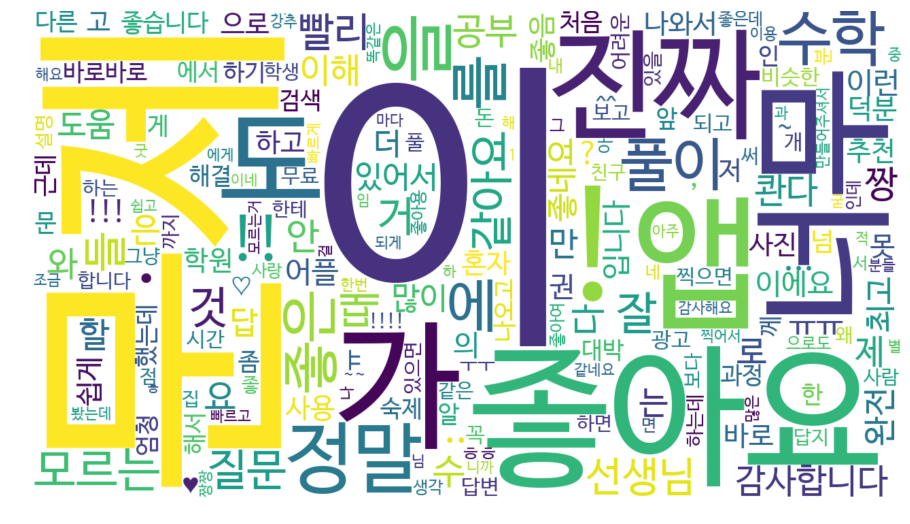

In [10]:
# draw Word Cloud

wc = WordCloud(font_path=font_path, width=1280 , height=720, background_color="white").generate_from_frequencies(cnt)

plt.figure(figsize=(16,9))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

# Heat Map

In [0]:
# TODO : 히트맵에서 한글이 깨짐 ㅠㅠ

In [31]:
# import pprint

# # !cp $font_path /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# # !ls -l /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/Nanum*
# font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# !ls -l /root/.local/share/fonts
# pprint.pprint(font_list)

# # font_dirs = [os.path.dirname(font_path), ]
# # font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
# # font_list = font_manager.createFontList(font_files)
# # print(font_list)
# # font_manager.fontManager.ttflist.extend(font_list)

# # plt.rcParams['font.family'] = font_path

total 1300
-rw-r--r-- 1 root root 1327840 Jun  5 09:01 NanumBarunGothicSubset.ttf
['/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf',
 '/root/.local/share/fonts/NanumBarunGothicSubset.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/liberation

In [32]:
# # print(plt.rcParams["datapath"])
# # !ls -l /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf
# # font_name = font_manager.FontProperties(fname=font_path).get_name()
# # print(font_name)
# # plt.rc('font', family=font_name, size=14)
# # rc('font', family=font_name)
# rc('font', family='NanumBarunGothicSubset.ttf')
# print (plt.rcParams['font.family'] )
# print(plt.rcParams["font.size"] )

['NanumBarunGothicSubset.ttf']
10.0


In [0]:
# def get_processed_data(origin_df, start_date, end_date):
    
#     query = origin_df[(origin_df.Date_Time >= start_date) & (origin_df.Date_Time <= end_date)]

#     q = query[['Review Text', 'Date_Time']].dropna()
#     q.columns = ['Reviews', 'Date_Time']
#     q.index = range(len(q))

#     q['preprocess'] = q.Reviews.apply(lambda text : " ".join(parser.morphs(text)))
#     cnt = Counter(word for line in q.preprocess for word in line.split())
    
#     return q, cnt

In [0]:
# query_1, counter_1 = get_processed_data(origin, '2018-03-01', '2018-03-10')
# query_2, counter_2 = get_processed_data(origin, '2018-03-11', '2018-03-20')
# query_3, counter_3 = get_processed_data(origin, '2018-03-21', '2018-03-31')

In [0]:
# df = pd.DataFrame([counter_1, counter_2, counter_3]).T
# df.columns = ['small 10일', 'medium 10일', 'large 10일']
# df = df.apply(lambda x : x / np.sum(x))
# df = df.apply(lambda x : (x-min(x)) / (max(x)-min(x)))
# df = df.dropna()

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothicSubset.ttf'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


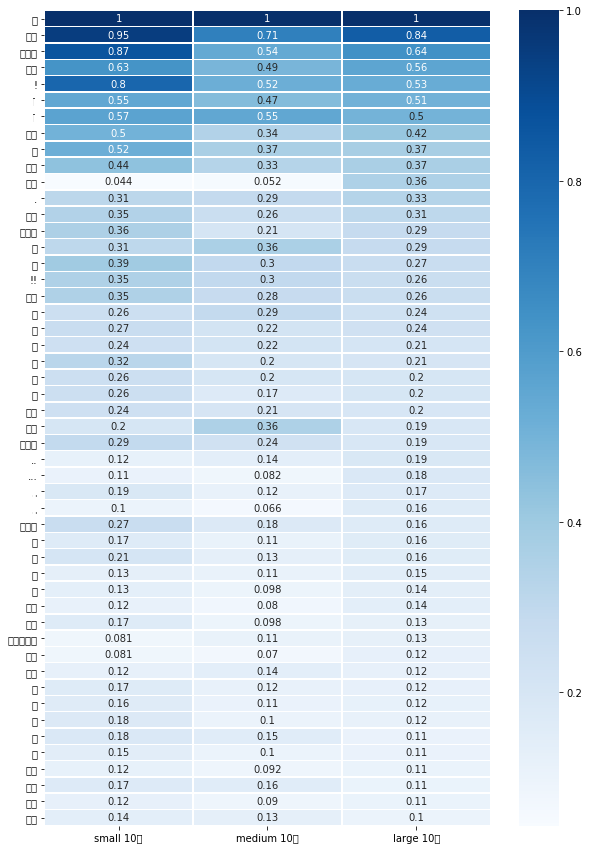

In [33]:
# plt.figure(figsize=(10,15))
# sns.heatmap(df.sort_values(df.columns[2], ascending=False).iloc[:50], annot=True, linewidths=0.5, cmap="Blues")